## Code example

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import functions

In [2]:
np.random.seed(0)
long=10*365 # survey duration in days
deltatc=1. # cadence for LC_conti()

### Generating single continuous artificial light curve

In [4]:
tt, yy = functions.LC_conti(long, deltatc=1, oscillations=True, A=0.14, noise=0.00005, z=0, frame='observed')

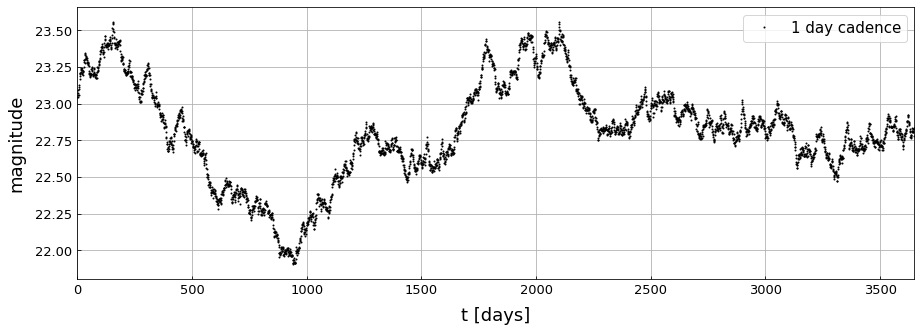

In [7]:
fig = plt.figure(figsize=(15,5))
    
ax = fig.add_subplot(111)
ax.plot(tt, yy, 'ko', markersize = 1, label='1 day cadence')

custom_xlim = (0, long)
custom_ylim = (yy.min()-0.1, yy.max()+0.1)
ax.set_xlabel('t [days]', fontsize = 18, labelpad=10)
ax.set_ylabel('magnitude', fontsize = 18, labelpad=10)
ax.tick_params(direction='in', pad = 5, labelsize=13)
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
ax.legend(fontsize=15)
ax.grid(True)

### Creating artificial light curves with different monthly cadences

In [8]:
# Cadence of 1 day during 3 months in each year (May, June, July). No observations in the remaining months. 
cad3m1_tt, cad3m1_yy = functions.var_cad(tt, yy, m5=1, m6=1, m7=1)

# Cadence of 4 days during 3 months in each year.
cad3m4_tt, cad3m4_yy = functions.var_cad(tt, yy, m5=4, m6=4, m7=4)

# Cadence of 10 days during 3 months in each year.
cad3m10_tt, cad3m10_yy = functions.var_cad(tt, yy, m5=10, m6=10, m7=10)

In [9]:
ts = [tt, cad3m1_tt, cad3m4_tt, cad3m10_tt]
ys = [yy, cad3m1_yy, cad3m4_yy, cad3m10_yy]
labels = ['Homogenous LC','3 months/1 day cadence', '3 months/4 day cadence', '3 months/10 day cadence']

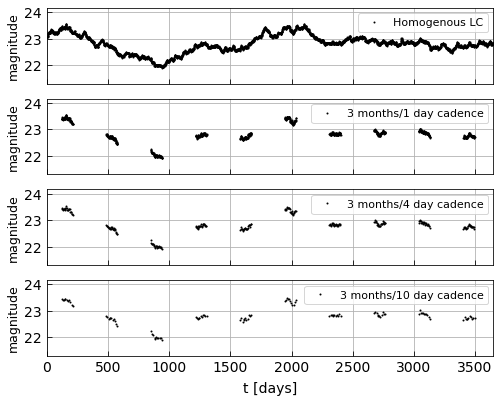

In [18]:
fig = plt.figure(figsize=(8,6.4))
custom_xlim = (0, long)
custom_ylim = (yy.min()-0.6, yy.max()+0.6)
i = 1
for t,y,l in zip(ts,ys, labels):
    ax = fig.add_subplot(len(ts),1,i)
    ax.plot(t,y, 'ko', markersize = 1, label=l)
    
    if i == len(ts):
        ax.set_xlabel('t [days]', fontsize=14, labelpad=7)
    else:
        plt.setp(ax.get_xticklabels(), visible=False)

    ax.set_ylabel('magnitude', fontsize = 12.5)
    ax.tick_params(axis='both', which='major', labelsize=14, direction='in', length = 5, pad = 5)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True)
    
    i = i+1

### Generating artificial light curves with variable cadences

In [19]:
# Variable cadence (for each year): 6 months/30 day cadence, 3 months/1 day cadence & 3 months no observation.
cadvar_tt, cadvar_yy = functions.var_cad(tt, yy, m1=30, m5=1, m6=1, m7=1, m8=30, m9=30, m10=30, m11=30, m12=30)

In [20]:
ts = [tt, cadvar_tt]
ys = [yy, cadvar_yy]
labels = ['1 day cadence','variable cadence']

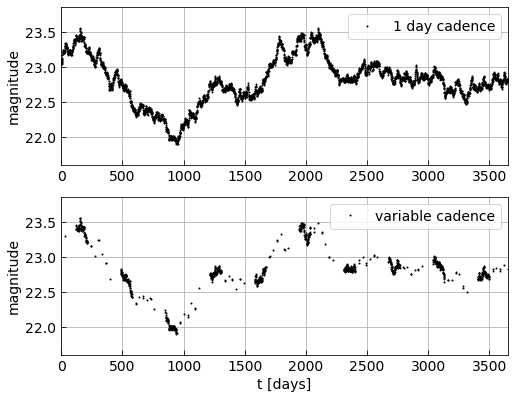

In [21]:
fig = plt.figure(figsize=(8,6.4))
custom_xlim = (0, long)
custom_ylim = (yy.min()-0.3, yy.max()+0.3)
i = 1
for t,y,l in zip(ts,ys, labels):
    ax = fig.add_subplot(len(ts),1,i)
    ax.plot(t,y, 'ko', markersize = 1, label=l)
    
    if i == len(ts):
        ax.set_xlabel('t [days]', fontsize=14)
    else:
        plt.setp(ax.get_xticklabels(), visible=True)

    ax.set_ylabel('magnitude', fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=14, direction='in', length = 5, pad = 5)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    ax.legend(fontsize=14)
    ax.grid(True)
    
    i = i+1

**Lets create gappy light curves with different gap sizes & different cadences**

In [22]:
cad3m_tt, cad3m_yy = functions.var_cad(tt, yy, m5=10, m6=1, m7=1)
cad6m_tt, cad6m_yy = functions.var_cad(tt, yy, m5=10, m6=10, m7=1, m8=1, m9=1, m10=1)
cad9m_tt, cad9m_yy = functions.var_cad(tt, yy, m2=10, m3=10, m4=1, m5=1, m6=10, m7=10, m8=1, m9=1, m10=1)

In [23]:
ts = [tt, cad3m_tt, cad6m_tt, cad9m_tt]
ys = [yy, cad3m_yy, cad6m_yy, cad9m_yy]
labels = ['1 day cadence', 'gappy obs 3 mon./year', 'gappy obs 6 mon./year', 'gappy obs 9 mon./year']

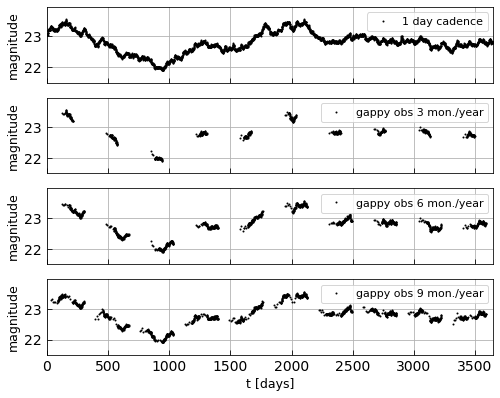

In [24]:
fig = plt.figure(figsize=(8,6.4))
custom_xlim = (0, long)
custom_ylim = (yy.min()-0.4, yy.max()+0.4)
i = 1
for t,y,l in zip(ts,ys, labels):
    ax = fig.add_subplot(len(ts),1,i)
    ax.plot(t,y, 'ko', markersize = 1, label=l)
    
    if i == len(ts):
        ax.set_xlabel('t [days]', fontsize=12.5)
    else:
        plt.setp(ax.get_xticklabels(), visible=False)

    ax.set_ylabel('magnitude', fontsize = 12.5)
    ax.tick_params(axis='both', which='major', labelsize=14, direction='in', length = 5, pad = 5)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True)
    
    i = i+1

### Structure functions

In [25]:
# Lets create structure functions for previously generated light curves.

ts = [tt, cad3m_tt, cad6m_tt, cad9m_tt]
ys = [yy, cad3m_yy, cad6m_yy, cad9m_yy]
labels = ['1 day cadence','gappy LC 3 mon./yr observed', 'gappy LC 6 mon./yr observed', 'gappy LC 9 mon./yr observed']

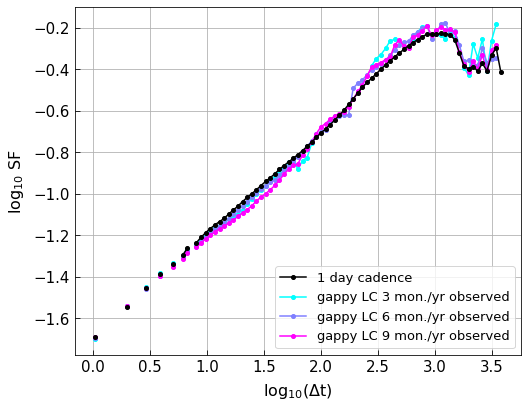

In [28]:
fig = plt.figure(figsize=(8,6.4))

ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$\log_{10}(\Delta \mathrm{t})$', fontsize = 16, labelpad=7)
ax1.set_ylabel(r'$\log_{10} \ \mathrm{SF}$', fontsize = 16, labelpad=7)

color=iter(plt.cm.cool(np.linspace(0,1,3)))
for t, y, l in zip(ts, ys, labels):
    s, edge = functions.sf(t, y, z=0)
    if l=="1 day cadence":
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), 'ko-',linewidth=1.5, markersize=4,label=l, zorder=3)
    else:
        c=next(color)
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), c=c, linewidth=1.5, marker='o', markersize=4, label=l)
        

ax1.tick_params(axis='both', which='major', labelsize=15, direction='in', length = 5, pad = 5)
ax1.legend(fontsize=13, loc='lower right')
ax1.grid(True)


### OpSim light curves

First, we need to import OpSim visits in MJD. Here, we give an example of OpSim realization for fixed coordinates in the sky in r filter.

In [29]:
mjd1=np.loadtxt('agn_dat/agn_r_ra_0.0_de_-30.0.dat')
mjd1=np.sort(mjd1)

We will generate a new continuous light curve to use for evaluation of flux in times provided by OpSim realization. 

In [30]:
long = 3650 # duration of the survey
tt, yy = functions.LC_conti(long)

`LC_opsim()` function can be used to determine flux values in OpSim provided days of the survey.

In [31]:
top, yop = functions.LC_opsim(mjd1, tt, yy)

In [32]:
ts = [tt, top]
ys = [yy, yop]
labels = ['1 day cadence','AGN_r_OpSim']

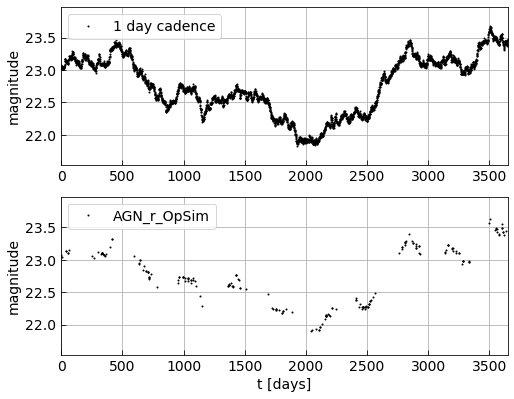

In [33]:
fig = plt.figure(figsize=(8,6.4))
custom_xlim = (0, long)
custom_ylim = (yy.min()-0.3, yy.max()+0.3)
i = 1
for t,y,l in zip(ts,ys, labels):
    ax = fig.add_subplot(len(ts),1,i)
    ax.plot(t,y, 'ko', markersize = 1, label=l)
    
    if i == len(ts):
        ax.set_xlabel('t [days]', fontsize=14)
    else:
        plt.setp(ax.get_xticklabels(), visible=True)

    ax.set_ylabel('magnitude', fontsize = 14)
    ax.tick_params(axis='both', which='major', labelsize=14, direction='in', length = 5, pad = 5)
    plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
    ax.legend(fontsize=14)
    ax.grid(True)
    
    i = i+1

Lets create structure functions for both light curves.

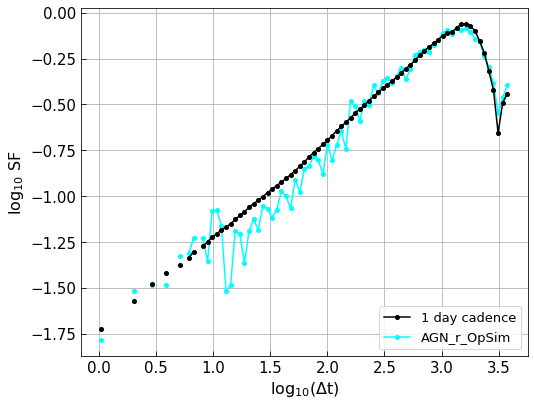

In [34]:
fig = plt.figure(figsize=(8,6.4))

ax1 = fig.add_subplot(111)
ax1.set_xlabel(r'$\log_{10}(\Delta \mathrm{t})$', fontsize = 16)
ax1.set_ylabel(r'$\log_{10} \ \mathrm{SF}$', fontsize = 16)

color=iter(plt.cm.cool(np.linspace(0,1,3)))
for t, y, l in zip(ts, ys, labels):
    s, edge = functions.sf(t, y)
    if l=="1 day cadence":
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), 'ko-',linewidth=1.5, markersize=4,label=l, zorder=3)
    else:
        c=next(color)
        ax1.plot(np.log10(edge[:-1]+np.diff(edge)/2), np.log10(np.sqrt(s)), c=c, linewidth=1.5, marker='o', markersize=4, label=l)
        

ax1.tick_params(axis='both', which='major', labelsize=15, direction='in', length = 5, pad = 5)
ax1.legend(fontsize=13, loc='lower right')
ax1.grid(True)


### Using it all together for an arbitrary number of OpSim realizations

We load OpSim realizations in r, g and u filters for a fixed area in the sky.

In [35]:
mjd1=np.loadtxt('agn_dat/agn_g_ra_0.0_de_-30.0.dat')
mjd1=np.sort(mjd1)

mjd2=np.loadtxt('agn_dat/agn_r_ra_0.0_de_-30.0.dat')
mjd2=np.sort(mjd2)

mjd3=np.loadtxt('agn_dat/agn_u_ra_0.0_de_-30.0.dat')
mjd3=np.sort(mjd3)

opsims = [mjd1, mjd2, mjd3]
labels = ['AGN_g', 'AGN_r', 'AGN_u']

Now, we can use our convenient function `LC_SF_viz()` to get all the light curves, as well as their structure functions in one line of code.

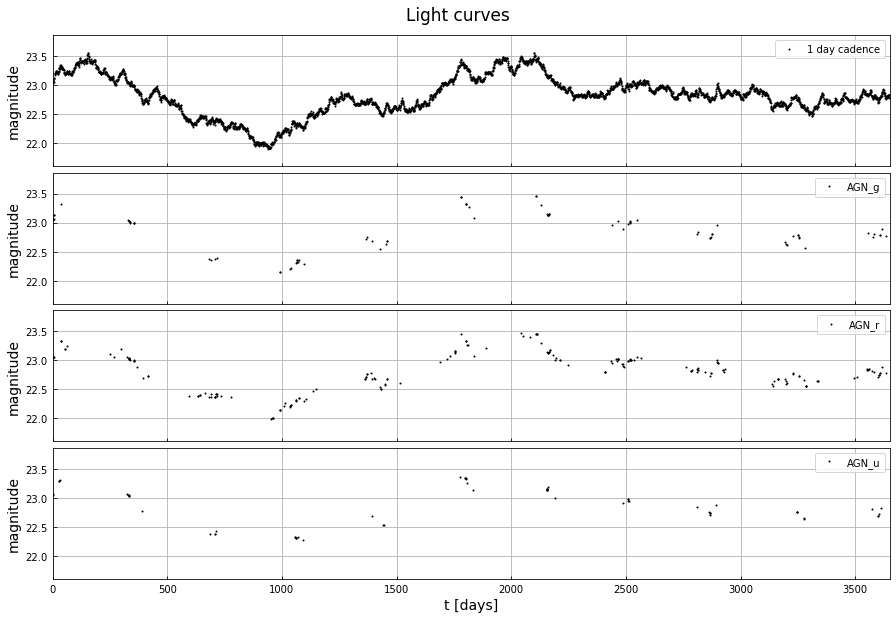

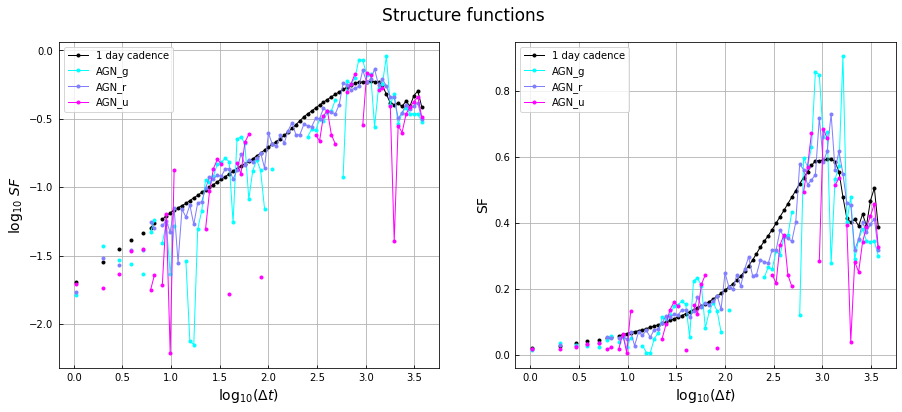

In [37]:
np.random.seed(0)
functions.LC_SF_viz(long, deltatc, opsims, labels)

### Optimal cadence estimation using SF metrics described in Kovacevic et al. 2021